In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/ASUS/Machine_Learning/100_Days_Of _Machine_Learning/Feature_Engineering/Datasets/placement(1).csv")
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [3]:
df.shape

(1000, 3)

**Now plotting graph to check whether the data is normally distributed or not**

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12760\3792736820.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\AppData\Local\Temp\ipykernel_12760\3792736820.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or 

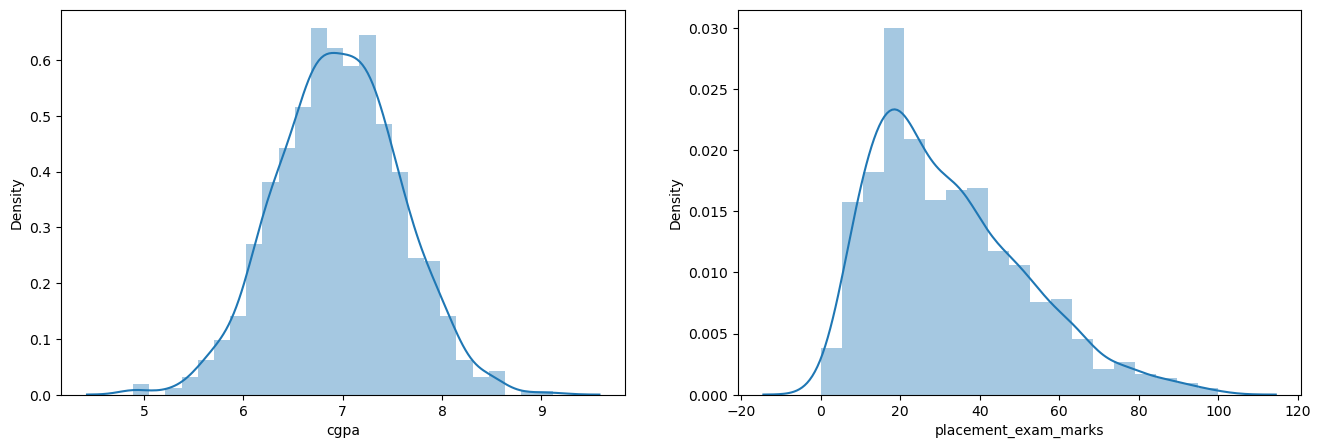

In [12]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

<Axes: ylabel='Density'>

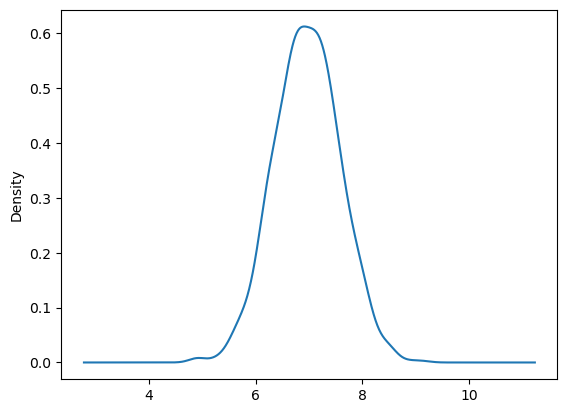

In [15]:
df.cgpa.plot(kind = 'density')

<Axes: ylabel='Density'>

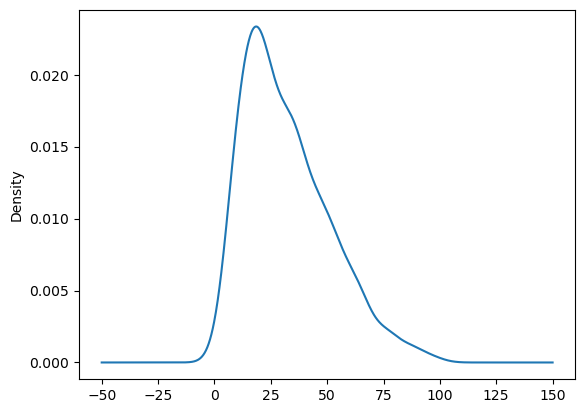

In [16]:
df.placement_exam_marks.plot(kind = 'density')

**So, cgpa col is normally distributed.**

In [13]:
df.placement_exam_marks.skew()

0.8356419499466834

In [17]:
print('mean of cgpa',df.cgpa.mean())
print('mean of cgpa',df.cgpa.std())
print('mean of cgpa',df.cgpa.max())
print('mean of cgpa',df.cgpa.min())

mean of cgpa 6.96124
mean of cgpa 0.6158978751323894
mean of cgpa 9.12
mean of cgpa 4.89


**Let's find the boundary**

In [20]:
upper_b = df.cgpa.mean() + (3 * df.cgpa.std())
lower_b = df.cgpa.mean() - (3 * df.cgpa.std())

In [19]:
upper_b

8.808933625397168

In [21]:
lower_b

5.113546374602832

**Finding the outliers**

In [24]:
df[(df.cgpa < 5.11) | (df.cgpa > 8.81)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


# Trimming

In [28]:
df1 = df[(df.cgpa < 8.81) & (df.cgpa > 5.11)]
df1

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [29]:
df1.shape

(995, 3)

**Calculating z_score**

In [33]:
df['z_score'] = (df.cgpa - df.cgpa.mean()) / df.cgpa.std()
df.head()

,cgpa,placement_exam_marks,placed,z_score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [35]:
df[(df.z_score < -3) | (df.z_score > 3)]

,cgpa,placement_exam_marks,placed,z_score
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [37]:
# Trimming

df2 = df[(df.z_score > -3) & (df.z_score < 3)]
df2

,cgpa,placement_exam_marks,placed,z_score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


# Capping

In [38]:
upper_b

8.808933625397168

In [39]:
lower_b

5.113546374602832

In [41]:
df['cgpa'] = np.where(df.cgpa > upper_b,upper_b,np.where(df.cgpa < lower_b,lower_b,df.cgpa))

In [42]:
df.cgpa

0      7.190000
1      7.460000
2      7.540000
3      6.420000
4      7.230000
         ...   
995    8.808934
996    8.808934
997    5.113546
998    8.620000
999    5.113546
Name: cgpa, Length: 1000, dtype: float64